### INFO284 Machine Learning Exam, spring 2024 
Przybys & 144


### Table of contents
1. [Introduction](#introduction)
2. [Project Setup](#project-setup)
2. [Exploring Data](#exploringData)
3. [Data Preprocessing](#data-preprocessing)
4. [Feature Engineering](#feature-engineering)
5. [Modeling](#modeling)
6. [Evaluation](#evaluation)
7. [Conclusion](#conclusion)
8. [References](#references)


### Introduction (136)

This report is about machine learning on fisheries data from Norwegian Directorate of Fisheries. The dataset is from 2018 and several of the original columns have already been removed by our lecturer to create a better reference point. The main objective with our models has been to predict the “Rundvekt” continuous values on species “Torsk”, “Sei, and “Hyse”. This is categorized as a quantitative regression problem and our group has been working according to relevant principles within such a problem space. The report will include reasoning for choices made within data exploration, preprocessing, feature engineering, and the use of the specific machine learning models implemented. The project will implement three supervised machine learning models, including one deep learning model. Additionally, we will develop an unsupervised clustering model, for which a distinct data preprocessing approach is permitted.

### Project Setup <a name="project-setup"></a>

##### Importing and versioncontrol for our choosen libraries

In [2]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
#xgboost is not part of the standard anaconda distribution
# Pip 21.3+ is required
#pip install xgboost
#https://xgboost.readthedocs.io/en/stable/install.html
import xgboost as xgb
print("xgboost version: {}".format(xgb.__version__))

Python version: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]


pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.0
IPython version: 8.23.0
scikit-learn version: 1.4.2
seaborn version: 0.13.2
xgboost version: 2.0.3


#### Importing the dataset

In [3]:
filePath = 'elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv'
# Keep in mind that the file is encoded in UTF-8 so it will only work if you have the correct version of pandas.
df = pd.read_csv(filePath, encoding="UTF-8" , delimiter=";")
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 45 columns and 305434 rows


In [4]:
def status_dataframe(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    print(f"Datasettet har nå {dataframe.shape[1]} kolonner og {dataframe.shape[0]} rader")
    display(dataframe.head(5))
    dataframe.info()
status_dataframe(df)

Datasettet har nå 45 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

### <a id='#exploringData'></a>Exploring Data

Regarding our problem space we already inherit some knowledge about what datatype we want to work with. So intuitively we know that numerical values will be more relevant than categorical values. It is important not to let this control the data exploration too much, and to take important choices which could be wrong. The data exploration will be about investigating and building the foundation for the reasoning regarding the preprocessing and cleaning of data. At first glance there are 45 columns and 305433 rows. Initially more data is very useful for our deep learning model, but after analyzing various columns there is a large amount of redundancy, 370703 total missing values consisting of, wrong datatypes and plenty of categorical data which may not be relevant for us.

In [5]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [7]:
df.isnull().sum().sum()

370703

In [8]:
df.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [9]:
df.nunique()

Melding ID                  49437
Meldingstidspunkt           44411
Meldingsdato                  366
Meldingsklokkeslett          1440
Starttidspunkt              89322
Startdato                     375
Startklokkeslett             1440
Startposisjon bredde        18063
Startposisjon lengde        35508
Hovedområde start (kode)       56
Hovedområde start              55
Lokasjon start (kode)          83
Havdybde start               2375
Stopptidspunkt              89701
Stoppdato                     366
Stoppklokkeslett             1440
Varighet                     4593
Fangstår                        2
Stopposisjon bredde         18193
Stopposisjon lengde         35871
Hovedområde stopp (kode)       57
Hovedområde stopp              55
Lokasjon stopp (kode)          82
Havdybde stopp               2378
Trekkavstand                31409
Redskap FAO (kode)             31
Redskap FAO                    30
Redskap FDIR (kode)            17
Redskap FDIR                   17
Hovedart FAO (

In [10]:
print(df['Art FAO'].value_counts())
print(df['Art - FDIR'].value_counts())
print(df['Art - gruppe'].value_counts())
print(df['Hovedart FAO'].value_counts())

Art FAO
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - FDIR
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - gruppe
Torsk                                       56574
Annen torskefisk                            45286
Sei                                         42557
Hyse                                        39120
Annen flatfisk, bunnfisk og dypvannsfisk    25267
Ue

dropp kommentarer. except for tekniske ting
vise dataen underveis
dropna, påstander om hvorfor vi dropper de, bevis 
vise distribusjon av outliers
fillNA, groupBy, meldingsid, startstidspunkt
robustScaler, hvorfor vi bruker det, outliers
scalingData for modellene, forklar
gradientBoosting, scaling data hvorfor? Bedre optimum, forklare MultioutputRegressor
MLPR, not converging, learning rate importances
viktig train validation og test splits,
forklare typene features, 
skaleringen fit skal bare være på treningsdataen, skalering skal kun være minste og største verdiene i treningsdataen. 
scaler.fit()transform på treningsdataen
validationset ikke hellig, testdata = helt skjult frem til eksamen.
scaler.fit på testset

In [11]:
# Using the same seed for testing purposes makes the results more comparable
seed = 32

In [12]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [13]:
# Excluding irrelevant columns

# Fangstår has only 2 unique values
df.drop(columns = ['Fangstår'], inplace= True)

# Lengdegruppe (kode), Lengdegruppe, Bruttotonnasje 1969, Bruttotonnasje annen, Bredde, Fartøylengde all seem to be speaking of the boat doing the catching, with few unique values in each column.
# One of them should be kept as a feature, the rest discarded. We would suggest the most relevant to be Bruttotonasje, which speaks to how much cargo space there is.
# "Bruttotonnasje 1969" and "Bruttotonnasje annen" seem to have nan where the other one has a value, so first we will collapse them into one.
df['Bruttotonnasje'] = df['Bruttotonnasje annen'].combine_first(df['Bruttotonnasje 1969'])
df.drop(columns=['Bruttotonnasje annen', "Bruttotonnasje 1969", "Lengdegruppe", 'Bredde', 'Lengdegruppe (kode)'], inplace=True)

# All columns (kode) in them are cateogrical code representations of another column. For human-readability and to avoid mistaking the code for a continuous value we will remove them.
df.drop(columns=["Hovedområde start (kode)", "Lokasjon start (kode)", "Hovedområde stopp (kode)", "Lokasjon stopp (kode)", "Redskap FAO (kode)", "Redskap FDIR (kode)", "Hovedart FAO (kode)", "Hovedart - FDIR (kode)", "Art FAO (kode)", "Art - FDIR (kode)", "Art - gruppe (kode)", ], inplace = True)

# In both the "Redskap" and "Art" columns you have FAO and FDIR abbriviations. FAO = Food and Agriculture Organization of the United Nations and FDIR = Fiskeridirektoratet
# Due to "Hovedart" onyl having FAO uncoded we will stick to FAO. For the same reason we will remove "Art - gruppe"
df.drop(columns=["Art - gruppe", "Art - FDIR", "Redskap FDIR", 'Hovedart FAO'], inplace=True)

# The areas where they start and stop have 6 columns. A pair of coordiantes and name of area x2. Since we prefer the continuous features and coordinates=name of place we are removing the name.
df.drop(columns=["Hovedområde start", "Hovedområde stopp"], inplace=True)

# While time of day and date might be relevant we don't need all of them and we don't need to know when it was reported in. For now we will leave start/end date and time.
df.drop(columns=["Meldingsklokkeslett"], inplace=True)

# After trying to transform the remaining time columns into continuous values we could use they seemed to have no other effect on the result then longer prosessing time.
df.drop(columns=["Startklokkeslett", "Stoppklokkeslett"], inplace=True)

In [14]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0


In [15]:
df.shape

(305434, 20)

In [16]:
status_dataframe(df)

Datasettet har nå 20 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Melding ID            305434 non-null  int64  
 1   Meldingstidspunkt     305434 non-null  object 
 2   Meldingsdato          305434 non-null  object 
 3   Starttidspunkt        305434 non-null  object 
 4   Startdato             305434 non-null  object 
 5   Startposisjon bredde  305434 non-null  object 
 6   Startposisjon lengde  305434 non-null  object 
 7   Havdybde start        305434 non-null  int64  
 8   Stopptidspunkt        305434 non-null  object 
 9   Stoppdato             305434 non-null  object 
 10  Varighet              305434 non-null  int64  
 11  Stopposisjon bredde   305434 non-null  object 
 12  Stopposisjon lengde   305434 non-null  object 
 13  Havdybde stopp        305434 non-null  int64  
 14  Trekkavstand          305410 non-null  float64
 15  

count                       305434
mean     0 days 05:45:37.651996830
std      0 days 17:58:05.264515585
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max              111 days 00:00:00
Name: time_difference, dtype: object


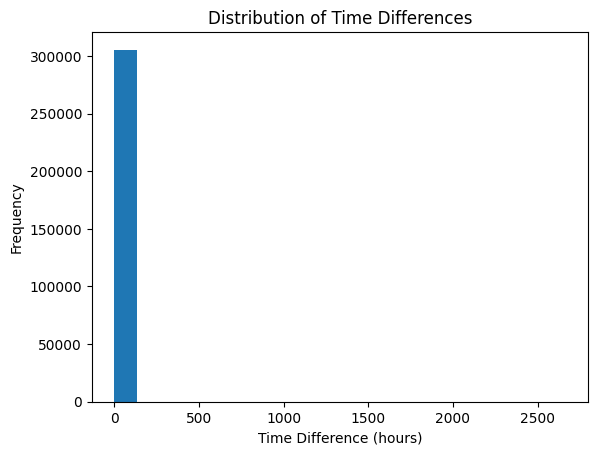

In [17]:
df['date_past'] = pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y')
df['date_future'] = pd.to_datetime(df['Meldingsdato'], format='%d.%m.%Y')

df['time_difference'] = df['date_future'] - df['date_past']

# Analyze the distribution of time differences
time_difference_stats = df['time_difference'].describe()

# Print summary statistics
print(time_difference_stats)

(df['time_difference'] / pd.Timedelta(hours=1)).plot.hist(bins=20)  # Convert to hours for better visualization
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences')
plt.show()

In [18]:
df['time_difference'].value_counts()

time_difference
0 days      234764
1 days       70216
2 days         210
4 days          59
3 days          54
6 days          39
5 days          24
18 days         23
19 days          8
7 days           8
88 days          7
14 days          4
8 days           4
11 days          2
10 days          2
111 days         2
87 days          2
12 days          2
15 days          1
28 days          1
9 days           1
82 days          1
Name: count, dtype: int64

In [19]:
def circular_encoder(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded

In [20]:
def circular_encode(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

df['Startposisjon bredde_sin'], df['Startposisjon bredde_cos'] = circular_encoder(df['Startposisjon bredde'], 180)
df['Startposisjon lengde_sin'], df['Startposisjon lengde_cos'] = circular_encoder(df['Startposisjon lengde'], 360)
df['Stopposisjon bredde_sin'], df['Stopposisjon bredde_cos'] = circular_encoder(df['Stopposisjon bredde'], 180)
df['Stopposisjon lengde_sin'], df['Stopposisjon lengde_cos'] = circular_encoder(df['Stopposisjon lengde'], 360)

df.drop(columns=["Startposisjon bredde", "Startposisjon lengde", 'Stopposisjon bredde', 'Stopposisjon lengde'], inplace=True)
status_dataframe(df)

Datasettet har nå 27 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje,date_past,date_future,time_difference,Startposisjon bredde_sin,Startposisjon bredde_cos,Startposisjon lengde_sin,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,-2740,01.01.2018,01.01.2018,1440,-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0,2018-01-01,2018-01-01,0 days,-0.859852,-0.510543,-0.720950,0.692987,-0.858960,-0.512043,-0.721156,0.692773
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                305434 non-null  int64          
 1   Meldingstidspunkt         305434 non-null  object         
 2   Meldingsdato              305434 non-null  object         
 3   Starttidspunkt            305434 non-null  object         
 4   Startdato                 305434 non-null  object         
 5   Havdybde start            305434 non-null  int64          
 6   Stopptidspunkt            305434 non-null  object         
 7   Stoppdato                 305434 non-null  object         
 8   Varighet                  305434 non-null  int64          
 9   Havdybde stopp            305434 non-null  int64          
 10  Trekkavstand              305410 non-null  float64        
 11  Redskap FAO               305246 non-null  object   

In [21]:
df['Startdag'] = (pd.to_datetime(df['Startdato'], format='%d.%m.%Y') - pd.to_datetime(df['Startdato'].str[-4:], format='%Y')).dt.days+1
df['Stoppdag'] = (pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y') - pd.to_datetime(df['Stoppdato'].str[-4:], format='%Y')).dt.days+1
df['Startdag_sin'], df['Startdag_cos'] = circular_encode(df['Startdag'], max_val=365)
df['Stoppdag_sin'], df['Stoppdag_cos'] = circular_encode(df['Stoppdag'], max_val=365)

In [22]:
df.shape

(305434, 33)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

Melding ID                  0
Meldingstidspunkt           0
Meldingsdato                0
Starttidspunkt              0
Startdato                   0
Havdybde start              0
Stopptidspunkt              0
Stoppdato                   0
Varighet                    0
Havdybde stopp              0
Trekkavstand                0
Redskap FAO                 0
Art FAO                     0
Rundvekt                    0
Fartøylengde                0
Bruttotonnasje              0
date_past                   0
date_future                 0
time_difference             0
Startposisjon bredde_sin    0
Startposisjon bredde_cos    0
Startposisjon lengde_sin    0
Startposisjon lengde_cos    0
Stopposisjon bredde_sin     0
Stopposisjon bredde_cos     0
Stopposisjon lengde_sin     0
Stopposisjon lengde_cos     0
Startdag                    0
Stoppdag                    0
Startdag_sin                0
Startdag_cos                0
Stoppdag_sin                0
Stoppdag_cos                0
dtype: int

In [25]:
df.shape

(297281, 33)

In [26]:
df = df[df['Art FAO'].isin(['Torsk', 'Sei', 'Hyse'])]

In [27]:
df = df[df['Varighet'] <= 400]
df = df[df['Trekkavstand'] <= 50000]

In [28]:
df.shape

(108619, 33)

In [29]:
# Manipulating columns
df['Trekkavstand'] = df['Trekkavstand'].astype(int)
df['Bruttotonnasje'] = df['Bruttotonnasje'].astype(int)
df['Varighet'] = df['Varighet'].astype(int)
df['Havdybde start'] = -df['Havdybde start'].abs()
df['Havdybde stopp'] = -df['Havdybde stopp'].abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108619 entries, 1 to 305428
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108619 non-null  int64          
 1   Meldingstidspunkt         108619 non-null  object         
 2   Meldingsdato              108619 non-null  object         
 3   Starttidspunkt            108619 non-null  object         
 4   Startdato                 108619 non-null  object         
 5   Havdybde start            108619 non-null  int64          
 6   Stopptidspunkt            108619 non-null  object         
 7   Stoppdato                 108619 non-null  object         
 8   Varighet                  108619 non-null  int32          
 9   Havdybde stopp            108619 non-null  int64          
 10  Trekkavstand              108619 non-null  int32          
 11  Redskap FAO               108619 non-null  object        

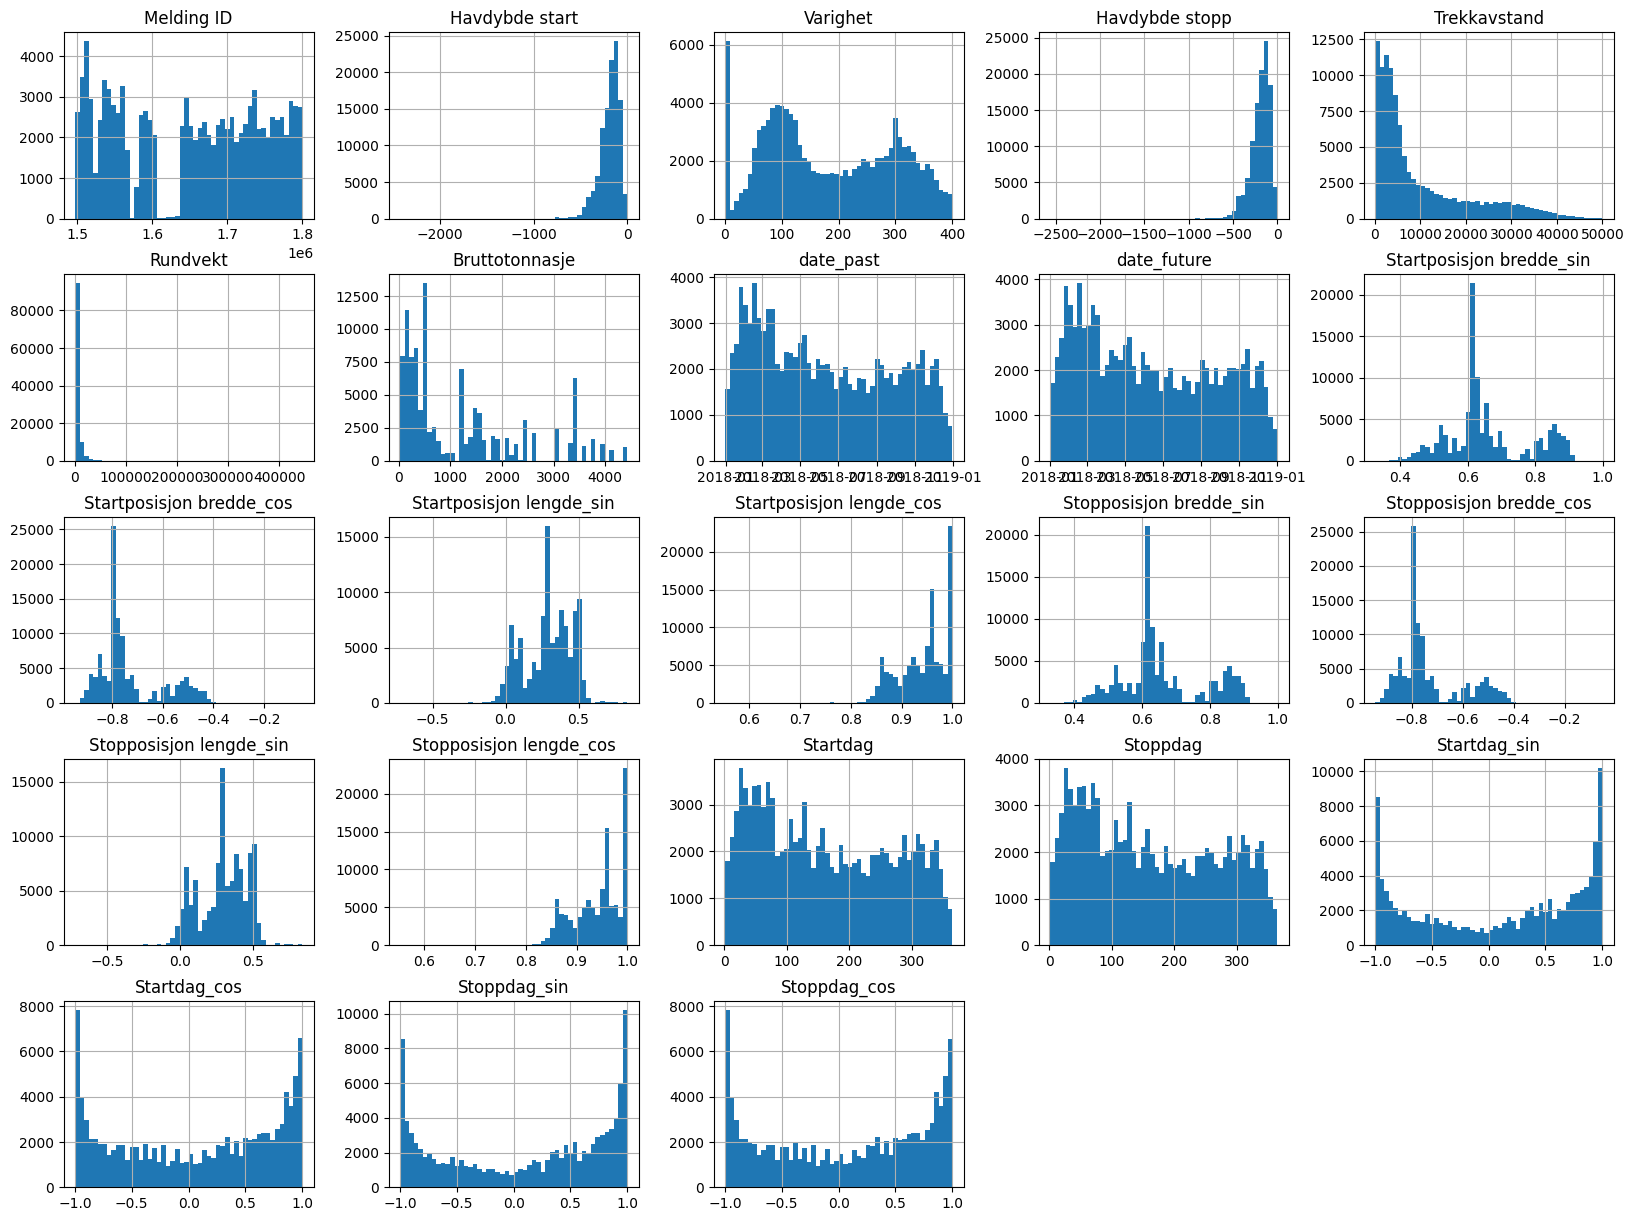

In [30]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Art FAO
Torsk    43757
Sei      32988
Hyse     31874
Name: count, dtype: int64


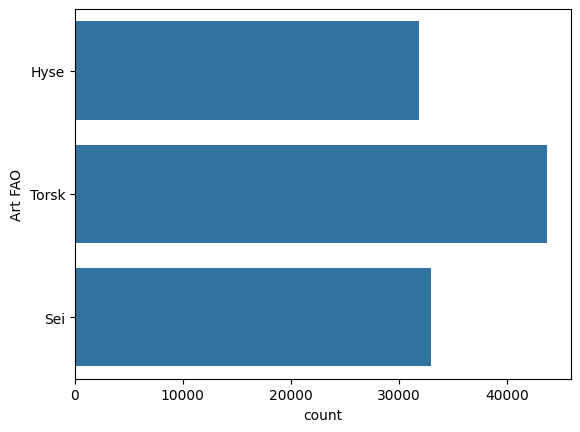

In [31]:
print(df['Art FAO'].value_counts())
sns.countplot(df['Art FAO'])
plt.show()

In [32]:
#counting unique again
df.nunique()

Melding ID                  22345
Meldingstidspunkt           21249
Meldingsdato                  366
Starttidspunkt              48314
Startdato                     367
Havdybde start                710
Stopptidspunkt              48259
Stoppdato                     366
Varighet                      401
Havdybde stopp                757
Trekkavstand                21201
Redskap FAO                    25
Art FAO                         3
Rundvekt                    14291
Fartøylengde                  288
Bruttotonnasje                297
date_past                     366
date_future                   366
time_difference                 8
Startposisjon bredde_sin    13395
Startposisjon bredde_cos    13395
Startposisjon lengde_sin    21756
Startposisjon lengde_cos    21003
Stopposisjon bredde_sin     13479
Stopposisjon bredde_cos     13479
Stopposisjon lengde_sin     22105
Stopposisjon lengde_cos     21333
Startdag                      365
Stoppdag                      365
Startdag_sin  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108619 entries, 1 to 305428
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108619 non-null  int64          
 1   Meldingstidspunkt         108619 non-null  object         
 2   Meldingsdato              108619 non-null  object         
 3   Starttidspunkt            108619 non-null  object         
 4   Startdato                 108619 non-null  object         
 5   Havdybde start            108619 non-null  int64          
 6   Stopptidspunkt            108619 non-null  object         
 7   Stoppdato                 108619 non-null  object         
 8   Varighet                  108619 non-null  int32          
 9   Havdybde stopp            108619 non-null  int64          
 10  Trekkavstand              108619 non-null  int32          
 11  Redskap FAO               108619 non-null  object        

In [34]:
df['Art FAO'].value_counts()

Art FAO
Torsk    43757
Sei      32988
Hyse     31874
Name: count, dtype: int64

In [35]:
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 33 columns and 108619 rows


In [36]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje,date_past,date_future,time_difference,Startposisjon bredde_sin,Startposisjon bredde_cos,Startposisjon lengde_sin,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Startdag,Stoppdag,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Hyse,9594.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Torsk,8510.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Sei,134.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
5,1497178,01.01.2018,01.01.2018,31.12.2017 05:48,31.12.2017,-403,31.12.2017 10:15,31.12.2017,267,-277,11096,"Bunntrål, otter",Hyse,9118.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.502718,-0.864450,0.273422,0.961894,0.502990,-0.864292,0.279796,0.960060,365,365,6.432491e-16,1.000000,6.432491e-16,1.0
6,1497178,01.01.2018,01.01.2018,31.12.2017 05:48,31.12.2017,-403,31.12.2017 10:15,31.12.2017,267,-277,11096,"Bunntrål, otter",Torsk,6651.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.502718,-0.864450,0.273422,0.961894,0.502990,-0.864292,0.279796,0.960060,365,365,6.432491e-16,1.000000,6.432491e-16,1.0


### Transforming dataframe with pivot

Due to our unique problem space, we have chosen to transform our dataframe with the pivot function. While analyzing the structure of the orginal dataframe we saw that each row was to represent a single species of what they caught identified with timestamp. These were usually structured in groups of three with the same ID and timestamp regarding Hyse, Sei, and Torsk. To make the data more structured and easier to work with we wanted to create Hyse,Sei, and Torsk as their own columns. With pivot, we could pivot based on columns,index, and values. The pivot is done on 'Art FAO' column which represents what they caught. Using values='Rundvekt' we are accurately representing each of the earlier single row entries as their own columns. In addition to this, using index works as a unique identifier and is grouped accordingly after everything in the index. Pivot is very similar to groupby, but with pivot we can create a new dataframe with the columns we want to pivot on, therefore it was disregarded. The instances where the fishing boats did not catch all our target species, pivot function fills the missing values with NaN. This is positive allowing us to fill the NaN values with 0, which is more suitable for our problem space representing they did not catch any of it. In conclusion each row now represents a single line of what they caught, with the columns Hyse,Sei, and Torsk the weight of each species.

In [37]:
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 33 columns and 108619 rows


In [38]:
df = df.pivot_table(index=['Melding ID','Starttidspunkt','Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos', 'Havdybde start', 'Varighet', 'Havdybde stopp', 'Trekkavstand',
'Redskap FAO','Bruttotonnasje','Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos'],
columns='Art FAO', values='Rundvekt').reset_index()
print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

After pre-processing the dataset has 23 columns and 51080 rows


In [39]:
df.head()

Art FAO,Melding ID,Starttidspunkt,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos,Hyse,Sei,Torsk
0,1497178,30.12.2017 23:21,0.503472,0.276443,-0.864011,0.961030,0.502598,-0.864521,0.275117,0.961411,-335,295,-334,3970,"Bunntrål, otter",1476,-1.721336e-02,0.999852,6.432491e-16,1.000000,9594.0,134.0,8510.0
1,1497178,31.12.2017 05:48,0.502718,0.273422,-0.864450,0.961894,0.502990,-0.864292,0.279796,0.960060,-403,267,-277,11096,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,9118.0,67.0,6651.0
2,1497178,31.12.2017 11:34,0.503533,0.276577,-0.863976,0.960992,0.502296,-0.864696,0.271306,0.962493,-346,315,-496,10215,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,12432.0,68.0,5097.0
3,1497178,31.12.2017 17:44,0.502084,0.272028,-0.864819,0.962289,0.502235,-0.864731,0.273859,0.961770,-443,243,-358,3214,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,6758.0,NaN,7022.0
4,1497229,01.01.2018 10:01,0.698965,0.224475,-0.715156,0.974480,0.698990,-0.715132,0.223965,0.974597,-71,63,-56,1269,Snurrevad,51,1.721336e-02,0.999852,1.721336e-02,0.999852,4.0,NaN,NaN


In [40]:
df.isna().sum()

Art FAO
Melding ID                      0
Starttidspunkt                  0
Startposisjon bredde_sin        0
Startposisjon lengde_sin        0
Startposisjon bredde_cos        0
Startposisjon lengde_cos        0
Stopposisjon bredde_sin         0
Stopposisjon bredde_cos         0
Stopposisjon lengde_sin         0
Stopposisjon lengde_cos         0
Havdybde start                  0
Varighet                        0
Havdybde stopp                  0
Trekkavstand                    0
Redskap FAO                     0
Bruttotonnasje                  0
Startdag_sin                    0
Startdag_cos                    0
Stoppdag_sin                    0
Stoppdag_cos                    0
Hyse                        19206
Sei                         18092
Torsk                        7326
dtype: int64

### Filling NaN values with 0 reasoning

```
Hyse                        19254
Sei                         18125
Torsk                        7345
```

As shown there are only NaN values in the columns Hyse, Sei, and Torsk, due to our deliberate pivot function. Earlier missing values were dropped even earlier in cleaning of data and is therefore only present in the newly created target columns. As mentioned earlier these values are filled with 0 to represent the fishing boats not catching any of the species.

In [41]:
df.fillna(0, inplace=True)
df.isnull().sum().sum()

0

In [42]:
print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

After pre-processing the dataset has 23 columns and 51080 rows


### Intepreting distribution

Keeping the targets distribution of values in mind, the values had quite a big range. 

In [43]:
df[['Hyse', 'Sei', 'Torsk']].describe()

Art FAO,Hyse,Sei,Torsk
count,51080.000000,51080.000000,51080.000000
mean,1121.476096,3011.415642,3657.012245
std,3012.047077,7955.568683,6542.888964
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,100.000000
50%,64.000000,192.000000,800.000000
75%,580.000000,2585.250000,4750.000000
max,53021.000000,215000.000000,444994.000000


Distribution from 0-444994 this could create a lot of noise making the models score poorly. Looking at the datapoints density we also see most of the fish are in the lower range of the distribution. This could have a large impact on the models if the outliers are not treaten. 

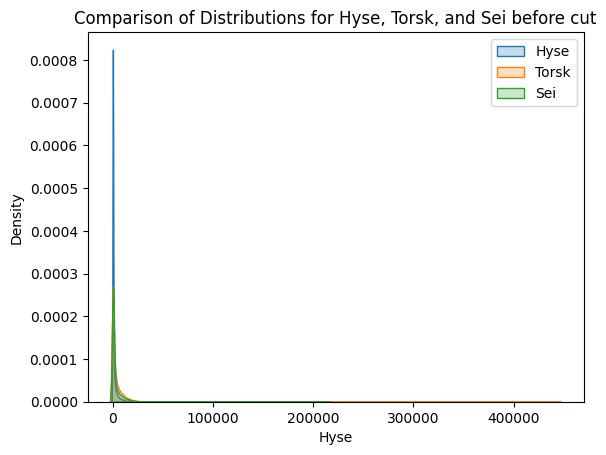

In [44]:
import seaborn as sns
sns.kdeplot(df['Hyse'], label='Hyse', fill=True)
sns.kdeplot(df['Torsk'], label='Torsk', fill=True)
sns.kdeplot(df['Sei'], label='Sei', fill=True)
plt.title('Comparison of Distributions for Hyse, Torsk, and Sei before cut')
plt.legend()
plt.show()

To further investigate if the outliers actually are outliers we will count the instances of species above 15000 as a starting point.

In [45]:
print(df[df['Hyse'] > 15000].shape)
print(df[df['Sei'] > 15000].shape)
print(df[df['Torsk'] > 15000].shape)

(564, 23)
(2389, 23)
(2860, 23)


Seeing that there are only around 5,813 instances above 15000 we are removing these instances from the dataset. We already know that the dataset is quite large so removing these instances will not have a large impact on the dataset. 
```
Torsk    43859
Sei      33076
Hyse     31947
```

The specific value chosen in cutoff is not arbitrary, but based on manuel repeated testing. The value 14596 scored the best and we found out that this is one of the biggest affecting values regarding the model scores.

In [46]:
#cutting off every value above 10000 in Hyse, Sei and Torsk
df = df[df['Hyse'] <= 14596]
df = df[df['Sei']  <= 14596]
df = df[df['Torsk']<= 14596]

The density is the highest in the lower range of the distribution

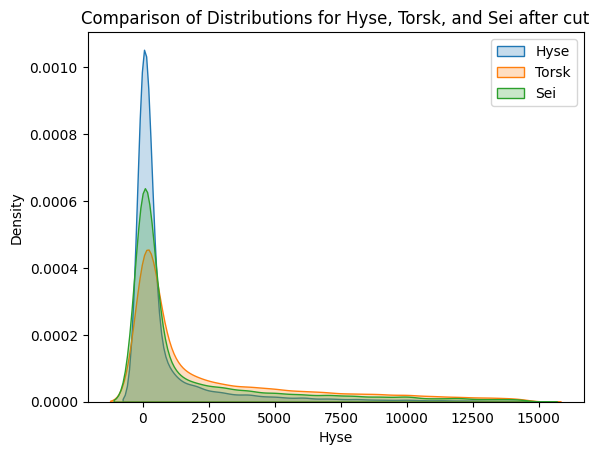

In [47]:
import seaborn as sns
#plotting the distribution of the species
sns.kdeplot(df['Hyse'], label='Hyse', fill=True)

# Plot KDE for 'Torsk'
sns.kdeplot(df['Torsk'], label='Torsk', fill=True)

# Plot KDE for 'Sei'
sns.kdeplot(df['Sei'], label='Sei', fill=True)

# Adding title
plt.title('Comparison of Distributions for Hyse, Torsk, and Sei after cut')

# Show the plot with all KDEs on the same graph
plt.legend()
plt.show()

In [48]:
print('After cutting off values above 14596')
print(df[df['Hyse'] > 14596].shape)
print(df[df['Sei'] > 14596].shape)
print(df[df['Torsk'] > 14596].shape)

After cutting off values above 14596
(0, 23)
(0, 23)
(0, 23)


In [49]:
#unqiue values in columns
df.nunique()

Art FAO
Melding ID                  20864
Starttidspunkt              42666
Startposisjon bredde_sin    12694
Startposisjon lengde_sin    20280
Startposisjon bredde_cos    12694
Startposisjon lengde_cos    19586
Stopposisjon bredde_sin     12758
Stopposisjon bredde_cos     12758
Stopposisjon lengde_sin     20546
Stopposisjon lengde_cos     19852
Havdybde start                706
Varighet                      401
Havdybde stopp                752
Trekkavstand                19814
Redskap FAO                    25
Bruttotonnasje                296
Startdag_sin                  365
Startdag_cos                  338
Stoppdag_sin                  365
Stoppdag_cos                  338
Hyse                         3964
Sei                          6236
Torsk                        7579
dtype: int64

In [50]:

print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")
df.head()

After pre-processing the dataset has 23 columns and 44786 rows


Art FAO,Melding ID,Starttidspunkt,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos,Hyse,Sei,Torsk
0,1497178,30.12.2017 23:21,0.503472,0.276443,-0.864011,0.961030,0.502598,-0.864521,0.275117,0.961411,-335,295,-334,3970,"Bunntrål, otter",1476,-1.721336e-02,0.999852,6.432491e-16,1.000000,9594.0,134.0,8510.0
1,1497178,31.12.2017 05:48,0.502718,0.273422,-0.864450,0.961894,0.502990,-0.864292,0.279796,0.960060,-403,267,-277,11096,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,9118.0,67.0,6651.0
2,1497178,31.12.2017 11:34,0.503533,0.276577,-0.863976,0.960992,0.502296,-0.864696,0.271306,0.962493,-346,315,-496,10215,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,12432.0,68.0,5097.0
3,1497178,31.12.2017 17:44,0.502084,0.272028,-0.864819,0.962289,0.502235,-0.864731,0.273859,0.961770,-443,243,-358,3214,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,6758.0,0.0,7022.0
4,1497229,01.01.2018 10:01,0.698965,0.224475,-0.715156,0.974480,0.698990,-0.715132,0.223965,0.974597,-71,63,-56,1269,Snurrevad,51,1.721336e-02,0.999852,1.721336e-02,0.999852,4.0,0.0,0.0


### Scaling Numerical Features Logic

Choosing MinMaxScaler over other scaling methods, such as StandardScaler, is particularly strategic when you have already handled outliers in your data manually. Since MinMaxScaler scales data to a fixed range between 0 and 1, it can be more sensitive to outliers than StandardScaler, which centers the data around the mean and scales it based on the standard deviation. By manually managing outliers before applying MinMaxScaler, you reduce the risk of outlier influence and ensure that the scaling reflects the true bounds of your feature distribution, thus supporting more effective learning across different machine learning models. This approach helps avoid relying on the models to manage outlier influences themselves, which can lead to inconsistent learning and performance degradation, especially in models sensitive to the scale of input features.

In [51]:
from sklearn.preprocessing import MinMaxScaler
num_feat = df[['Havdybde start','Varighet', 'Havdybde stopp', 'Trekkavstand', 'Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos','Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos','Bruttotonnasje', 'Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_feat)
scaled_df = pd.DataFrame(scaled_features, columns=num_feat.columns)

In [52]:
scaled_df.head()

Art FAO,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
0,0.862438,0.7375,0.870125,0.079441,0.264526,0.641857,0.091094,0.913058,0.259717,0.089615,0.640958,0.913940,0.330232,0.491393,0.999926,0.500000,1.000000
1,0.834432,0.6675,0.892356,0.222035,0.263406,0.639917,0.090604,0.914985,0.260303,0.089871,0.643963,0.910926,0.330232,0.500000,1.000000,0.500000,1.000000
2,0.857908,0.7875,0.806942,0.204406,0.264615,0.641943,0.091133,0.912972,0.259267,0.089419,0.638510,0.916354,0.330232,0.500000,1.000000,0.500000,1.000000
3,0.817957,0.6075,0.860764,0.064313,0.262465,0.639021,0.090193,0.915866,0.259177,0.089379,0.640150,0.914741,0.330232,0.500000,1.000000,0.500000,1.000000
4,0.971170,0.1575,0.978549,0.025393,0.554826,0.608475,0.257295,0.943064,0.552812,0.257045,0.608102,0.943348,0.006809,0.508607,0.999926,0.508607,0.999926


In [53]:
#counting the instances  of each species Hyse, Sei, Torsk
print(df['Hyse'].value_counts().sum())
print(df['Sei'].value_counts().sum())   
print(df['Torsk'].value_counts().sum())

44786
44786
44786


In [54]:
#dbscan for clustering
from sklearn.cluster import DBSCAN


# #using dbscan
# dbscan = DBSCAN(eps=0.3, min_samples=5)
# dbscan.fit(scaled_df)
# #counting the clusters
# print(dbscan.labels_)
# print(np.unique(dbscan.labels_))

#looking for relevant relations between Torsk, Sei, Hyse and coordinates
#plotting species and coordinates
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Torsk', data=df)
# plt.title('Torsk distribution in terms of coordinates')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Sei')
# plt.title('Sei distribution')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Hyse')
# plt.title('Hyse distribution')
# plt.show()

### Onehot-encoding Logic

One-hot encoding the 'Redskap FAO' (fishing gear) categorical feature for your machine learning models, such as Random Forest, Gradient Boosting, and MLPRegressor, is highly effective despite these models' capability to handle categorical data. This encoding method transforms the feature into a format that avoids any implicit ordinal interpretation by the models, ensuring each category is treated equally and independently. By representing each type of fishing gear as a separate binary feature, one-hot encoding not only captures subtle differences in fishing techniques that might influence catch outcomes for species like Torsk, Hyse, and Sei, but also enhances model interpretability and performance. This aligns with best practices in machine learning for handling categorical data, as detailed in "Introduction to Machine Learning with Python" by Andreas C. Müller and Sarah Guido.

In [55]:
# One-hot encode the categorical features. 
from sklearn.preprocessing import OneHotEncoder
cat_feat = df[['Redskap FAO']]
encoder = OneHotEncoder()
enc_feat= encoder.fit_transform(cat_feat)
enc_df = pd.DataFrame(enc_feat.toarray(), columns=encoder.get_feature_names_out())

features = pd.concat([enc_df, scaled_df], axis=1)
targets = df[['Hyse', 'Sei', 'Torsk']]
features.head()

,Redskap FAO_Andre liner,Redskap FAO_Annen trål (udefinert),Redskap FAO_Boat /vessel seines -Pair seines,Redskap FAO_Bunntrål (uspes),"Redskap FAO_Bunntrål, otter","Redskap FAO_Bunntrål, par","Redskap FAO_Bunntrål, reke",Redskap FAO_Encircling gillnets*,"Redskap FAO_Flytetrål, otter","Redskap FAO_Flytetrål, par","Redskap FAO_Flytetrål, uspesifisert",Redskap FAO_Gillnets and entangling nets (unspec)*,"Redskap FAO_Juksa/pilk, manuell",Redskap FAO_Otter dobbeltrål,"Redskap FAO_Partrål, uspesifisert",Redskap FAO_Settegarn,Redskap FAO_Setteline,Redskap FAO_Snurpenot/ringnot,"Redskap FAO_Snurpenot/ringnot, et fartøy","Redskap FAO_Snurpenot/ringnot, to fartøy",Redskap FAO_Snurrevad,"Redskap FAO_Snurrevad, dansk","Redskap FAO_Snurrevad, skotsk",Redskap FAO_Udefinert garn,Redskap FAO_Udefinert trål,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862438,0.7375,0.870125,0.079441,0.264526,0.641857,0.091094,0.913058,0.259717,0.089615,0.640958,0.913940,0.330232,0.491393,0.999926,0.500000,1.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834432,0.6675,0.892356,0.222035,0.263406,0.639917,0.090604,0.914985,0.260303,0.089871,0.643963,0.910926,0.330232,0.500000,1.000000,0.500000,1.000000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857908,0.7875,0.806942,0.204406,0.264615,0.641943,0.091133,0.912972,0.259267,0.089419,0.638510,0.916354,0.330232,0.500000,1.000000,0.500000,1.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817957,0.6075,0.860764,0.064313,0.262465,0.639021,0.090193,0.915866,0.259177,0.089379,0.640150,0.914741,0.330232,0.500000,1.000000,0.500000,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.971170,0.1575,0.978549,0.025393,0.554826,0.608475,0.257295,0.943064,0.552812,0.257045,0.608102,0.943348,0.006809,0.508607,0.999926,0.508607,0.999926


### Correlation Matrix Insight

To get a better understanding of the data we implemented a correlation matrix. The matrix only takes numerical values in as input, but that is still highly relevant for us since dataset is mainly consisting of these. Looking at the correlation matrix we see the targets 'Hyse', 'Sei', and 'Torsk' having a low correlation with every other relation except for a few. Scoring the highest is Torsk with Startposisjon lengde_sin and Torsk with Stopposisjon lengde_sin with both 0.36. We interpret this as a weak score and generally confirms our initial analysis of it being a non-linear regression problem. Some of the other features has a higher score, but this is not as relevant. 

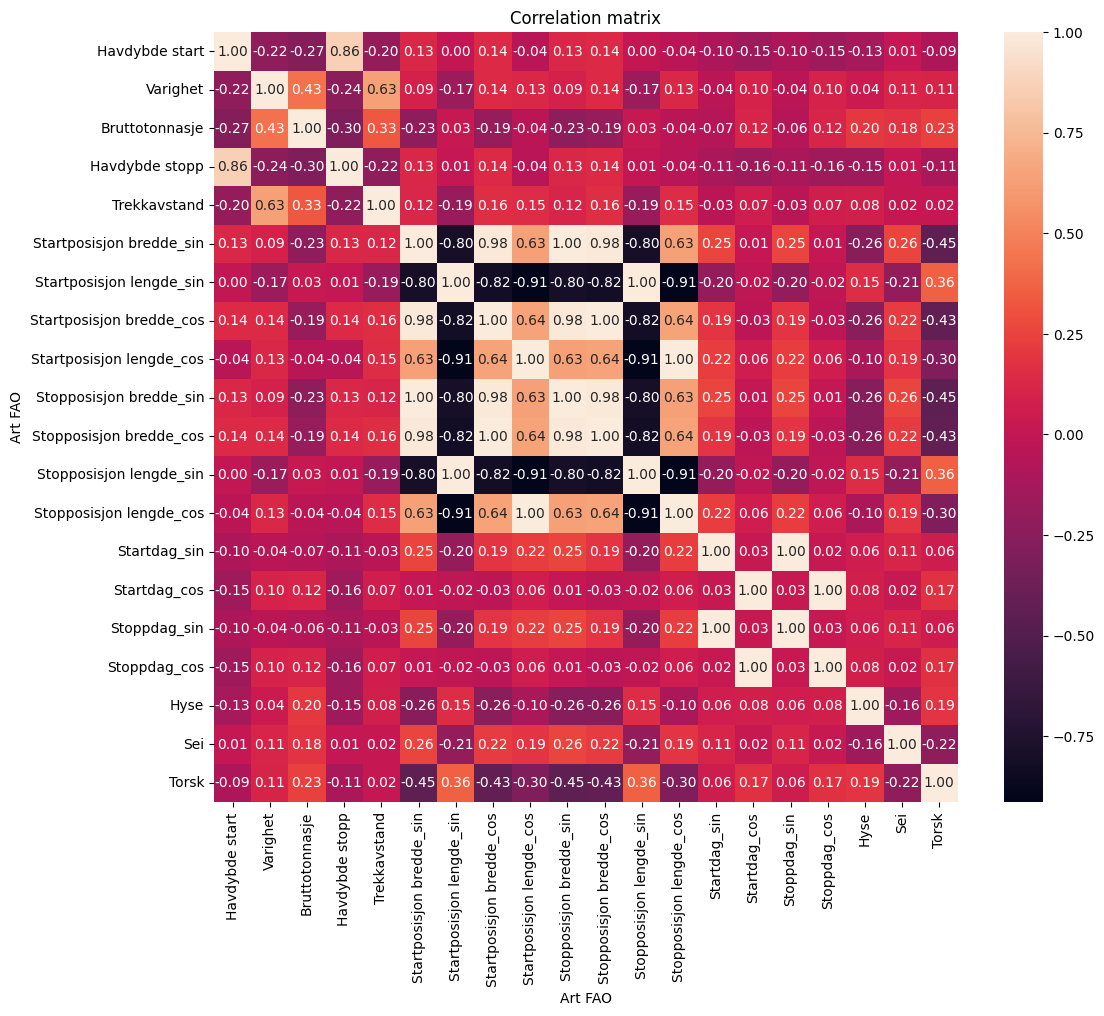

In [56]:
df_corr = df[['Havdybde start','Varighet','Bruttotonnasje', 'Havdybde stopp', 'Trekkavstand','Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos', 'Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos', 'Hyse', 'Sei', 'Torsk']]
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f") 
plt.title('Correlation matrix')
plt.show() 

In [57]:
df.shape

(44786, 23)

## <a id='modeling'></a>Modeling (102)
In a machine learning project choosing the right models is of major importance. When having 3 targets you also cancel out a lot of models which cannot handle multiple targets in a good way naturally. Due to the nature of our problem space we have chosen RandomForestRegressor, Xtreme Gradient Boosting and MLPRegressor as our 3 supervised models, where MLPRegressor is the deep learning one. After having analyzed and explored the data it were indications of non-linearity in the dataframe. The correlation matrix showed no signs of strong relationships between the targets and features. Therefore, the conclusion was made to focus on using models which can handle non-linear relationships,and multiple outputs naturally without using any additional techniques. The reasoning for this was to keep it simple, avoid overcomplication, and use the models at what they are best at.

#### Splitting the data after standard practices (197)

Before diving into the models, it is important to explain the methodology behind splitting the data. The data is split into three parts, training, validation, (Müller & Guido, 2016, p. 262). The training data is used to train the model, the validation data is used to tune the hyperparameters of the model, and the test data is used to evaluate the model. The test data is not used until the final evaluation of the model. Using this practice we will keep test data hidden until final 'exam' evaluation. In our code, we split the data into training and testing sets with an 80/20 split. For clarification, 80% of data is used for training (X_train, y_train) and 20% is used for testing (X_val_test, y_val_test).

The remaining test set is split 75/25 into validation and test sets. This is done to ensure that the model is not overfitted to the validation set. The validation set is used to tune the hyperparameters of the model, while the test set is used to evaluate the model. By following these principles we are able to train, tune and test the models in a competent manner. The global end split is 80/15/5 for training, validation, and testing.

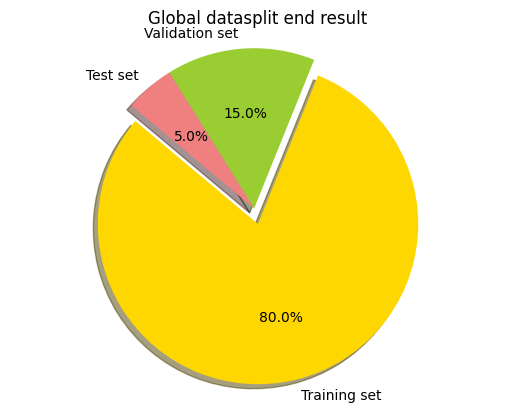

In [58]:
labels = 'Training set', 'Validation set','Test set'
sizes = [80, 15, 5]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Global datasplit end result')
plt.axis('equal')
plt.show()

#### (161)

The first model we implemented was RandomForestRegressor. Random Forests can model non-linear relationships between features and multiple targets. This is very useful regarding the shape of the dataframe. The model offers feature importance which is useful for understanding the features for further engineering and tuning in regards of prediction. Normal decicsion trees tend to overfit the training data compared to random forests(Supervised Machine Learning Algorithms | 83). There is generally no need for scaling the values in RFR, but for simplicities sake we do. The parameter values used in the first RFR model are all standard. N_jobs=-1 is added for letting our computers run all processors, further improving runtime. The reasoning for this was to keep the runtime low and give a quick impression regarding problem space. It is important to emphasize that using standard parameters does not equal an incompetent model. Parameter values are based on empirical evidence by sklearn themselves.

##### Baseline RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_val_test, y_train, y_val_test = train_test_split(scaled_df, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

rfr_baseline =  RandomForestRegressor(n_jobs=-1, random_state=seed)
rfr_baseline.fit(X_train, y_train)
y_val_pred = rfr_baseline.predict(X_val)
r2_baseline = r2_score(y_val, y_val_pred)
print(f"R2 score: {r2_baseline}")

R2 score: 0.6658585834569775


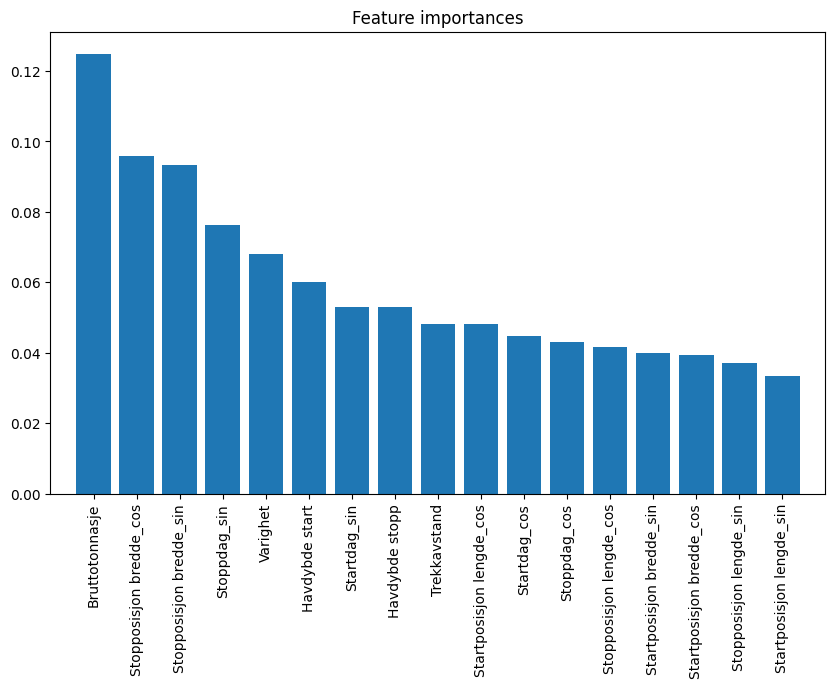

In [60]:
importances = rfr_baseline.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### KFold Cross Validation  (136)

To ensure that the models do not overfit the data, cross-validation is implemented. Initially, standard cross-validation was used, resulting in a very low R2 score, raising concerns about potential overfitting. To further investigate this, K-Fold cross-validation was implemented. The motivation behind this approach was to gain more insight into the data's sensitivity to variance. There was a suspicion that the data was very sensitive to variance, thus potentially misleading results. Implementing K-Fold was an effort to ensure more robustness against variance.

In [61]:
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor(n_jobs=-1, random_state=seed)
standard_scores = cross_val_score(rfr, scaled_df, targets, cv=5, scoring='r2')
print(f"R2 scores: {standard_scores}")
print(f"Mean R2 score: {standard_scores.mean()}")

R2 scores: [0.16774245 0.43179905 0.03884885 0.41437884 0.1200237 ]
Mean R2 score: 0.23455857654727028


The K-Fold cross-validation showed a considerable improvement, with an average R2 score of 0.67, compared to the 0.23 from the standard cross-validation. This approach is more effective in preventing overfitting by providing a more robust estimate of the model's performance against variance. Continuing in the project, K-Fold cross-validation will be used to evaluate the models.

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
kf_scores = cross_val_score(rfr_baseline, scaled_df, targets, scoring='r2', cv=kf)

print(f"Cross-validation scores: {kf_scores}")
print(f"Average cross-validation score: {kf_scores.mean()}")

Cross-validation scores: [0.66720982 0.66880288 0.66003034 0.65071993 0.65510554]
Average cross-validation score: 0.6603737021105957


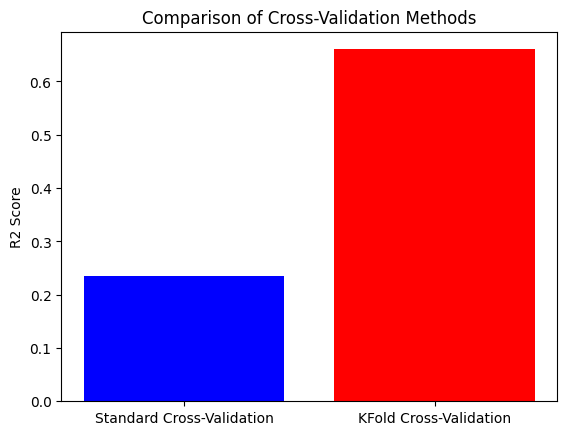

In [63]:
labels = ['Standard Cross-Validation', 'KFold Cross-Validation']
scores = [standard_scores.mean(), kf_scores.mean()]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylabel('R2 Score')
plt.title('Comparison of Cross-Validation Methods')
plt.show()

### Parameter tuning with grid search (178)
Now that we are evaluating the models properly, we implemented grid search to enhance generalization performance by tuning parameters. Grid search systematically searches for the optimal hyperparameters within a defined grid, trying every combination based on specified interest values. While grid search is computationally expensive, it is necessary for achieving the best results. By fine-tuning the model's hyperparameters, grid search aims to improve performance and robustness, which is critical, particularly in complex models and large datasets. The final test models will use the best parameters from the grid searches, ensuring that the model's performance is optimized.

Random Forest Regressor used the following grid search parameters:
```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
```
Xtreme Gradient Boosting used the following grid search parameters:
```
param_grid = {
    'eta': [0.5,0.4,0.3, 0.1, 0.01,0.001] # 0.3 is standard
}
```
MLPRegressor used the following grid search parameters:
```
param_grid = {
   'hidden_layer_sizes': [(100,), (100, 100), (100,100,100)]
}
```

For the more complex models as XGB, MLPR the grid search had to be limited to avoid long runtimes. The parameters chosen were based on what was most important for the models. For XGB the learning rate is the most important parameter, and for MLPR the hidden layer sizes are the most important. Taking this into consideration the models are not hypertuned to the maximum, but still optimized for better performance than initial state.

### RandomForestRegressor with combined features

The second RFR model uses both scaled and onehot-encoded features. One-hot encoding categorical data is a clever way of utilizing more of your data which could be relevant. After best practice we one-hot encoded a relevant categorical column Redskap FAO. So the rfr_combined_features is running the scaled_df features combined with Redskap FAO onehot-encoded values. 

In [64]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

rfr_combined_features = RandomForestRegressor(n_jobs=-1, random_state=seed)
grid_search = GridSearchCV(estimator=rfr_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_rfr = grid_search.best_estimator_
y_val_pred = best_rfr.predict(X_val)
r2_rfr_combined = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_rfr_combined}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Validation R2: 0.6693175572640722, Best parameters: {'max_depth': 30, 'n_estimators': 300}


In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(rfr_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.66864653 0.67450304 0.66400442 0.65427134 0.65858966]
Average cross-validation score: 0.6640029976617141


### Why we chose Xtreme Gradient Boosting over sklearn's Gradient Boosting

Since gradient boosting is a powerful ensemble method, it is important to choose the right implementation. Xtreme Gradient Boosting (XGBoost) is a more advanced and optimized version of the traditional gradient boosting algorithm. XGBoost is designed to be faster, more efficient, and more accurate than the traditional gradient boosting algorithm while also handling multioutputs. It is also more scalable and can handle large datasets with ease. In addition to these benefits, XGBoost has built-in regularization, which helps prevent overfitting and improves generalization performance. These advantages make XGBoost the preferred choice for many machine learning tasks, including regression problems like the one we are working on. We also tested the traditional Gradient Boosting model, but the results were not as good as XGBoost. Therefore, we chose to use XGBoost for our project.

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

gbr_combined_features = GradientBoostingRegressor(random_state=seed)
mor = MultiOutputRegressor(gbr_combined_features)
mor.fit(X_train, y_train)
y_val_pred = mor.predict(X_val)
r2_gbr = r2_score(y_val, y_val_pred)
print(f"R2 score: {r2_gbr}")

R2 score: 0.5382870308538151


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

param_grid = {
    'eta': [0.5,0.4,0.3, 0.1, 0.01,0.001] # 0.3 is standard
}

xgb_combined_features = XGBRegressor(n_jobs=-1, random_state=seed)
grid_search = GridSearchCV(estimator=xgb_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_xgbr = grid_search.best_estimator_
y_val_pred = best_xgbr.predict(X_val)
r2_xgbr = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_xgbr}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Validation R2: 0.6434395975334447, Best parameters: {'eta': 0.3}


In [68]:
#crossvalidating the model
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(xgb_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.64762218 0.64392425 0.64001397 0.63531022 0.64125804]
Average cross-validation score: 0.6416257313142697


### MLPRegressor

After researching different deep learning algorithms we decided to use MLPRegressor. Regarding our large dataset and the non-linear relationships in the data, MLPRegressor is a good choice. The model is a feedforward neural network that trains using backpropagation. It is capable of learning complex relationships between features and targets, making it suitable for regression problems like the one we are working on. MLPRegressor is also capable of handling multiple outputs, which is important for our problem space.  

```
'The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or
two hidden layers, and possibly expand from there.' 
```
###### (Müller & Guido, 2016, p. 118)

Following the recommendations from "Introduction to Machine Learning with Python" by Andreas C. Müller and Sarah Guido, we started with one hidden layer and expanded from there. The other parameters such as activation=relu, learning_rate=adaptive were chosen based on trying to make the model converge faster. Verbosity is 0, for a better presentation in github. Generally the model is not converging based on the standard max iterations, which were clear with verbose statements of each iterations. It is highly likely that the standard learning rate is not tuned good enough for the model, which is part of multiple reasons on why it performs worse. Therefore only hyper tuning the hidden layers was not good enough for such complex model.

In [69]:
from sklearn.neural_network import MLPRegressor

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

param_grid = {
   'hidden_layer_sizes': [(100,), (100, 100), (100,100,100)]
}

mlp_combined_features = MLPRegressor(random_state=seed, activation='relu', solver='adam', batch_size='auto', learning_rate='adaptive', shuffle=True,  early_stopping=True,verbose=0)
grid_search = GridSearchCV(estimator=mlp_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
y_val_pred = best_mlp.predict(X_val)
r2_mlp = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_mlp}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

Validation R2: 0.5455801202946183, Best parameters: {'hidden_layer_sizes': (100, 100, 100)}


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(mlp_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.30906321 0.30810564 0.30867345 0.3014524  0.30804227]
Average cross-validation score: 0.30706739330917243


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Viewing the training models as a whole we see that the randomforest with combined features  performed the best by a slight margin from baseline model. The randomforest models seem to be the most reliable for how the data is structured. Randomforests's ability to seperate out irrelevant features seemed to also be of importance regarding the score. Suprisingly the XGBoost performed worse than the randomforest models, even though it is more complex and should acheive higher results. A reason for this could be that the parameter tuning done, have not been optimal even though a small grid search was implemented. The MLPRegressor performed the worst, but in general a deep learning model have the potential to perform better than the other models. Lack of proper tuning and the complexity of the model could be the reason for the poor performance. 

### Results on non-test data

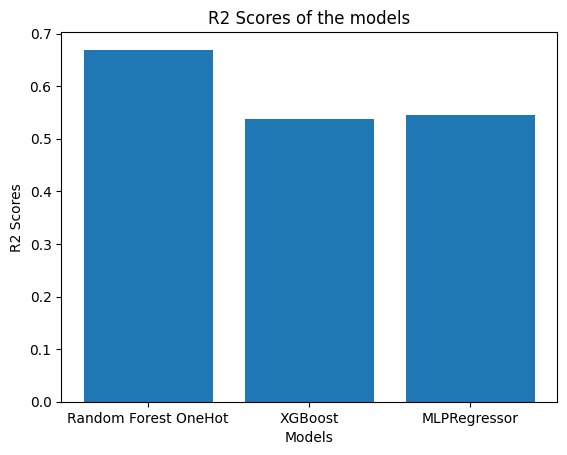

In [71]:
models = ['Random Forest OneHot', 'XGBoost', 'MLPRegressor']
r2_scores = [r2_rfr_combined, r2_xgbr, r2_mlp]
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores of the models on validation')
plt.show()  

### Model Exams

In [74]:
y_test_pred = best_rfr.predict(X_test)
r2_rfr = r2_score(y_test, y_test_pred)
print(f"Random Forest R2: {r2_rfr}")

y_test_pred = best_xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_test_pred)
print(f"XGBoost R2: {r2_xgbr}")

y_test_pred = best_mlp.predict(X_test)
r2_mlp = r2_score(y_test, y_test_pred)
print(f"MLP R2: {r2_mlp}")

Random Forest R2: 0.6769233416774899
XGBoost R2: 0.6537516369435893
MLP R2: 0.5278632296244887


```
Random Forest R2: 0.6769233416774899
XGBoost R2: 0.6537516369435893
MLP R2: 0.5278632296244887
```

### Discussing test model results, and what we have learned

### Citations